In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from konlpy.tag import Kkma
from konlpy.utils import pprint
from gensim.models.word2vec import Word2Vec

import warnings
warnings.filterwarnings("ignore")

C:\Users\tlsal\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [144]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
data = [["KB금융지주가 KB증권, KB캐피탈, KB부동산신탁 등 3개 계열사 대표를 새로 선정했다. 가장 큰 관심이 쏠렸던 KB증권 대표이사 후보에는 박정림 KB증권 부사장 겸 KB국민은행 부행장을 선정했다. 박 후보가 주주총회 등을 거쳐 최종 선임되면 금융투자업계 최초 여성 최고경영자(CEO)가 등장한다. KB금융은 19일 계열사 대표이사후보 추천위원회(이하 대추위)를 열고 KB증권·KB캐피탈·KB부동산신탁 등 7개 계열사 대표 후보를 선정했다고 밝혔다. KB증권 신임 대표이사 후보에는 박정림 KB증권 부사장 겸 KB국민은행 부행장과 김성현 KB증권 부사장을 추천했다. KB증권은 기존의 복수 대표체제를 유지한다. KB캐피탈에는 황수남 KB캐피탈 전무, KB부동산신탁에는 김청겸 KB국민은행 영등포 지역영업그룹대표가 각각 대표이사 후보로 선정됐다. 양종희 KB손해보험 대표, 조재민·이현승 KB자산운용 대표, 김해경 KB신용정보 대표는 재선정됐다. KB데이타시스템은 이른 시일 내에 적합한 인사를 찾아 추후 추천할 계획이다. 박정림 부사장이 KB증권 대표에 취임하면 증권사 최초로 여성 CEO가 탄생한다. 박 후보는 KB금융지주에서 WM(자산관리)과 리스크, 여신 등 요직을 두루 거쳤다. 그룹 WM 부문 시너지영업을 이끌며 리더십을 발휘하고 있다는 점을 높게 평가 받는다. 김성현 부사장은 대표적인 투자은행(IB) 전문가다. 투자자산 다변화를 통해 시장 지위를 바꿀 수 있는 리더십을 갖췄다는 평가를 받는다. 신임 대표는 20∼21일 계열사 대표이사후보 추천위원회의 최종 심사와 추천을 거쳐 주주총회에서 확정할 계획이다. 신임 대표 임기는 2년, 재선정 대표 임기는 1년이다."],
["서울 여의도에서 ‘카카오 카풀’에 반대하는 전국 택시업계 관계자들이 20일 대규모 집회를 벌인다. 택시기사 최 모 씨의 분신 등을 계기로 업계가 ‘총력투쟁’을 예고한 가운데 집회‧시위 시간이 출‧퇴근 시간과 겹쳐 이 시각 여의도 주변에 극심한 교통체증이 예상된다. 19일 경찰과 택시업계 등에 따르면 20일 오후 2시 전국택시노동조합연맹, 전국민주택시노동조합연맹, 전국개인택시운송사업조합연합회 등 4개 단체가 서울 여의도 국회 앞 의사당대로에서 3차 집회를 연다. 강신표 전국택시노동조합연맹 위원장은 집회를 하루 앞두고 열린 기자회견에서 “죽든지 살든지 총력 투쟁을 할 것”이라고 말했다. ‘국회를 포위하겠다던 기존 계획은 그대로 진행되느냐’는 질문에 강 위원장은 “그렇다”면서도 “만약 (경찰이) 막으면 할 수 없겠지만, 하는 데까지 최선을 다해 적폐 1호인 국회를 반드시 심판할 것”이라고 강조했다. 강 위원장은 “내일은 제주도를 포함한 전국의 택시가 운행을 중지한다”며 “앞으로 4차, 5차 집회 일정이 잡히면 그 날마다 택시 운행이 정지될 것”이라고 말했다. 이어 “자꾸 시민에게 불편을 드려죄송하지만 생존권을 지키기 위해 여의도 국회 앞에 모일 수밖에 없는 절박한 상황을 헤아려 주시길 바란다”고 덧붙였다."],
       ["'내보험 찾아줌' 홈페이지가 접속자 폭주로 인해 접속 대기시간이 길어지고 있다. 19일 오후 9시20분 현재 '내보험 찾아줌' 홈페이지에는 접속자 수가 몰리며 서비스 이용이 불가능한 상태다. 현재 사이트 접속자 수는 4641여명에 달한다. 금감원에 따르면 11월 말 기준 소비자가 찾아가지 않은 숨은 보험금은 약 9조8130억원인 것으로 나타났다.지난해 12월부터 지난달까지 숨은보험금 찾아주기 안내 활동을 통해 약 3조125억원(240만5000건)이 주인을 찾았다. 업권별로는 생명보험회사가 약 2조7907억원(222만건), 손해보험회사가 2218억원(18만 5000건)을 찾아줬다. 금감원은 20일부터 기존 '내보험 찾아줌' 서비스를 개선해 찾은 숨은보험금을 각 보험회사 온라인 청구시스템에 바로 접속할 수있도록 링크를 제공한다고 밝혔다. 기존 숨은 보험금 청구 시에는 소비자가 개별적으로 해당 보험회사 홈페이지, 콜센터, 계약 유지·관리 담당 설계사 등을 찾아 별도로 진행해야 하는 불편이 있었다. 앞으로는 '내보험 찾아줌' 홈페이지에 접속해 이름, 휴대폰 번호, 주민등록번호를 입력 후 휴대폰 인증을 거치면 생명보험 25개사, 손해보험 16개사 등 모두 41개 보험회사를 대상으로 숨은 보험금을 조회할 수 있다. 숨은 보험금이 있는 경우 해당 보험사에 보험금 지급청구를 하면 영업일 3일 이내 금액을 지급한다. 단 이미 보험금을 청구해 심사 중이거나 지급정지 등으로 청구할 수 없는 보험금은 조회되지 않는다."],
       ["KB증권은 김성현 KB증권 IB총괄 부사장과 박정림 KB증권 WM 부문 부사장을 신임 대표로 각각 선임했다고 19일 밝혔다. 윤경은, 전병조 대표이사가 자리에서 물러났지만 각자 대표이사 체제는 유지된다. 이는 WM과 IB의 부문을 각각 집중하기 위함으로 풀이된다. 특히 박 신임 대표는 증권업계 첫 여성 최고경영자(CEO)이다. 박 신임 대표는 서울대 경영학과·경영대학원 출신으로 1986년 체이스맨해튼 서울지점, 조흥은행, 삼성화재 등을 거쳐 2004년 처음으로 KB국민은행에 들어왔다. 당시 시장운영리스크 부장을 시작으로 2012년엔 WM본부장, 2014년 리스크관리그룹 부행장, 2015년 KB금융지주 리스크관리책임자 부사장 겸 리스크관리그룹 부행장을 맡았고 2016년엔 여신그룹 부행장을 맡았다. 작년부턴 KB금융 WM총괄 부사장 겸 은행 WM그룹 부행장 겸 KB증권 WM부문 부사장을 맡고 있다. KB금융지주는 박 신임 대표에 대해 WM, 리스크, 여신 등 폭넓은 업무 경험을 바탕으로 수익 확대에 대한 실행역량을 보유하고 있다고 밝혔다. 그룹 WM 부문의 시너지영업을 진두지휘하며 리더십을 발휘했다는 평가다. 현 IB총괄 부사장인 김성현 신임 대표는 IB부문을 총괄한다. 김 신임 대표이사는 연세대 경제학과를 졸업하고 1988년 대신증권에 입사한 이후 한누리투자증권을 거쳐 2008년 KB투자증권 기업금융본부장으로 임명됐다. 이후 2015년부터 KB투자증권 IB부문에서 일한 전문가다. KB금융지주는 김 신임 대표에 대해 IB 전문가로 투자자산 다변화 등을 통해 시장 지위를 개선시킬 수 있는 검증된 리더십을 보유했다고 평가했다."], 
        ["""서민금융진흥원은 지난 18일 서울 청계천로 본원에서 제2차 서민금융 전문가 간담회를 개최했다소 19일 밝혔다.

이번 간담회는 서민금융, 복지, 자활사업 등 각 분야 전문가들이 참석한 가운데, 정책서민금융 지원의 방향성에 대해서 의견을 청취하기 위해 마련됐다. 이날 이 원장은 "소득양극화와 고용부진 심화 등으로 서민·취약계층, 자영업자들의 경제적 어려움이 커지는 가운데 사회안전망으로서 서민금융의 역할이 중요한 시점"이라며, "현재 8등급 이하자가 263만명이고 이들중 74%가 연체중인 상황에서 정상적인 금융 이용이 어려운 취약계층에게 꼭 필요한 서민금융 지원을 위해 노력해야 한다"고 강조했다.

이어서 이 원장은 "현장 전문가의 의견을 반영하여 취약계층을 위한 금융과 함께 금융교육, 컨설팅, 종합상담 등 자활기반을 구축하도록 힘쓰겠다"고 밝혔다. 이날 참석자들은 '정책서민금융지원에 대한 방향성'에 대하여 다양한 의견을 제시했다.

진흥원은 이날 간담회의 다양한 제언들을 바탕으로 수요자가 체감할 수 있는 실질적인 방안 마련을 위해 더욱 노력하고, 지속적으로 서민금융 현장의 폭넓은 의견을 청취할 계획이다.
"""],
       ["""JB금융지주는 차기 회장 후보자로 김기홍 JB자산운용 대표(사진)를 선정했다.

19일 JB금융지주 임원후보추천위원회는 최종 후보군에 대해 PT발표와 심층면접을 진행한 후, 김 대표를 최종 후보자로 선정했다.

이날 PT발표와 심층면접에선 후보자의 JB금융그룹의 성장 비전과 전문성, 리더십, 기업의 사회적 책임 등 후보자의 역량에 대해 평가했으며, 김 대표는 은행을 비롯 보험사, 자산운용사 등 금융권 임원 경험을 바탕으로 금융 전반에 대한 전문적인 지식과 넓은 식견을 갖추고 있다는 점이 높이 평가됐다.

JB금융지주 임추위 관계자는 "김 후보자가 20년 이상 금융산업에 종사한 경험을 바탕으로 금융에 대한 전문적인 식견 뿐 만 아니라 리더십과 소통능력도 탁월하다"며 "급변하는 금융환경에 대응하고 계열사 간 시너지 창출을 통해 기업가치를 극대화하는 등 JB금융그룹을 최고의 소매전문 금융그룹으로 발전시킬 적임자"라고 밝혔다. 이에 따라 김 내정자는 내년 3월 정기주주총회와 이사회를 거쳐 대표이사 회장으로 선임 될 예정이다.
"""], 
        ["""1800만 근로자의 2018년 귀속 근로소득에 대한 연말정산 신고기간이 한 달여 앞으로 다가왔다.

올해 연말정산에는 중소기업 취업 청년에 대한 소득세 감면이 확대되고 도서·공연비 지출액에 대한 신용카드 사용액에 소득공제가 적용되는 등 새로운 기준이 적용되기 때문에 바뀐 공제 기준을 꼼꼼히 챙기는 것이 중요하다.

국세청은 올해 근로소득이 발생한 근로자는 내년 2월분 급여를 지급받을 때까지 연말정산을 신고해야 한다고 20일 밝혔다.

◇올해부터 달라지는 주요 공제 항목

올해 연말정산부터는 중소기업 취업 청년에 대한 소득세 감면을 받을 수 있는 대상 연령이 기존 29세에서 34세로 확대된다. 감면율도 70%에서 90%로 확대되고 감면 적용기간도 3년에서 5년으로 확대된다.

총급여액 7000만원 이하 근로자는 도서·공연비를 신용카드로 결제한 경우 해당 비용을 최대 100만원까지 추가 소득공제 받을 수 있다. 올 7월1일 이후 도서공연비로 지출한 금액의 소득공제율 30%가 적용되기 때문이다.

건강보험 산정특례 대상자로 등록된 부양가족을 위해 지출한 의료비는 기존 700만원 한도가 폐지되고 올해부터 전액공제를 받을 수 있게 됐다.

총급여액이 5500만원이거나 종합소득금액이 4000만원 초과 근로자의 경우 월세액 세액공제율이 10%에서 12%로 인상된다. 월세액 세액공제 한도는 750만원이며 임대차 계약서상 주소지와 계약기간 등 내역을 정확히 기재해야 공제를 받을 수 있다.

임차보증금 3억원 이하의 주택 임차보증금 반환 보증 보험료도 올해 연말정산부터 보험료 세액공제를 받을 수 있으며, 생산직 근로자의 초과근로수당 비과세 적용 시 기준이 되는 월정액 급여액은 150만원 이하에서 190만원 이하로 상향된다.

6세 이하 자녀 세액공제는 아동수당 지급에 따라 올해부터 폐지된다. 올 연말정산부터는 종교단체가 종교인에게 지급한 소득도 신고대상에 포함된다."""]
       ]

In [5]:
kkma = Kkma() #형태소 분석기를 konlpy의 kkma사용

## 데이터토큰화

In [9]:
kkma.sentences(data[0][0]) #sentence명령어는 문단구조를 문장구조로 변환시켜준다.

['KB 금융 지주가 KB 증권, KB 캐피탈, KB 부동산신탁 등 3개 계열사 대표를 새로 선정했다.',
 '가장 큰 관심이 쏠렸던',
 'KB 증권 대표이사 후보에는 박정림 KB 증권 부사장 겸 KB 국민은행 부행장을 선정했다.',
 '박 후보가 주주총회 등을 거쳐 최종 선임되면 금융투자업계 최초 여성 최고 경영자 (CEO) 가 등장한다.',
 'KB 금융은 19일 계열사 대표이사후보 추천위원회( 이하 대추 위 )를 열고 KB 증권 ·KB 캐피탈 ·KB 부동산신탁 등 7개 계열사 대표 후보를 선정했다고',
 '밝혔다.',
 'KB 증권 신임 대표이사 후보에는 박정림 KB 증권 부사장 겸 KB 국민은행 부행장과 김성 현 KB 증권 부사장을 추천했다.',
 'KB 증권은 기존의 복수 대표 체제를 유지한다.',
 'KB 캐피탈에는 황 수남 KB 캐피탈 전무, KB 부동산신탁에는 김 청 겸 KB 국민은행 영등포 지역 영업그룹 대표가 각각 대표이사 후보로 선정됐다.',
 '양 종희 KB 손해보험 대표, 조재 민· 이 현 승 KB 자산운용 대표, 김해경 KB 신용정보 대표는 재선 정됐다.',
 'KB 데이타시스템은 이른 시일 내에 적합한 인사를 찾아 추후 추천할 계획이다.',
 '박정림 부사장이 KB 증권 대표에 취임하면 증권사 최초로 여성 CEO가 탄생한다.',
 '박 후보는 KB 금융 지주에서 WM( 자산관리) 과 리스크, 여신 등 요직을 두루 거쳤다.',
 '그룹 WM 부문 시너지 영업을 이끌며 리더십을 발휘하고 있다는 점을 높게 평가 받는다.',
 '김성 현 부사장은 대표적인 투자 은행 (IB) 전문가다.',
 '투자자산 다변화를 통해 시장 지위를 바꿀 수 있는 리더십을 갖췄다는 평가를 받는다.',
 '신임 대표는 20∼21 일 계열사 대표이사후보 추천위원회의 최종 심사와 추천을 거쳐 주주총회에서 확정할 계획이다.',
 '신임 대표 임기는 2년, 재선정 대표 임기는 1년이다.']

In [12]:
sentence = [kkma.sentences(dt[0]) for dt in data]

## 토큰화 + 전처리

In [32]:
word=[]
for i in range(len(sentence)):
    word0 =[]
    for j in range(len(sentence[i])):
        word_len = kkma.nouns(sentence[i][j])
        if len(word_len)>=2: #문장에서 토큰화된 단어 갯수가 2개 이상
            word00=[]
            for k in range(len(word_len)):
                if len(word_len[k])>1: #단어 자체의 갯수가 2개이상인 것부터
                    word00.append(word_len[k])
            word0.append(word00)
    word.append(word0)

In [40]:
word

[[['금융', '지주', '증권', '캐피탈', '부동산', '부동산신탁', '신탁', '3개', '계열사', '대표', '선정'],
  ['증권',
   '대표',
   '대표이사',
   '이사',
   '후보',
   '박정',
   '부사장',
   '국민',
   '국민은행',
   '은행',
   '부행장',
   '선정'],
  ['후보',
   '주주',
   '주주총회',
   '총회',
   '최종',
   '선임',
   '금융',
   '금융투자업계',
   '투자',
   '업계',
   '최초',
   '여성',
   '최고',
   '경영자',
   '등장'],
  ['금융',
   '19',
   '19일',
   '계열사',
   '대표',
   '대표이사후보',
   '이사',
   '후보',
   '추천',
   '추천위원회',
   '위원회',
   '이하',
   '대추',
   '증권',
   '캐피탈',
   '부동산',
   '부동산신탁',
   '신탁',
   '7개',
   '선정'],
  ['증권',
   '신임',
   '대표',
   '대표이사',
   '이사',
   '후보',
   '박정',
   '부사장',
   '국민',
   '국민은행',
   '은행',
   '부행장',
   '추천'],
  ['증권', '기존', '복수', '대표', '체제', '유지'],
  ['캐피탈',
   '수남',
   '전무',
   '부동산',
   '부동산신탁',
   '신탁',
   '국민',
   '국민은행',
   '은행',
   '영등포',
   '지역',
   '영업',
   '영업그룹',
   '그룹',
   '대표',
   '대표이사',
   '이사',
   '후보',
   '선정'],
  ['종희',
   '손해',
   '손해보험',
   '보험',
   '대표',
   '조재',
   '자산',
   '자산운용',
   '운용',
   '김해경',
   '신용',
   '신용정보',
   '정보'

## 모델링
- 평소에 하듯이 w2v모델에 넣을 수 있도록 전처리
- wv.most_similar = 단어와 단어간 유사도 도출
- wv.similarity = 두개의 단어를 입력하여 유사도만 도출

In [36]:
word[0][0] + 

['금융', '지주', '증권', '캐피탈', '부동산', '부동산신탁', '신탁', '3개', '계열사', '대표', '선정']

In [49]:
word_ls = []
for i in range(len(word)):
    for j in range(len(word[i])):
        word_ls.append(word[i][j])
    

In [50]:
word_ls

[['금융', '지주', '증권', '캐피탈', '부동산', '부동산신탁', '신탁', '3개', '계열사', '대표', '선정'],
 ['증권',
  '대표',
  '대표이사',
  '이사',
  '후보',
  '박정',
  '부사장',
  '국민',
  '국민은행',
  '은행',
  '부행장',
  '선정'],
 ['후보',
  '주주',
  '주주총회',
  '총회',
  '최종',
  '선임',
  '금융',
  '금융투자업계',
  '투자',
  '업계',
  '최초',
  '여성',
  '최고',
  '경영자',
  '등장'],
 ['금융',
  '19',
  '19일',
  '계열사',
  '대표',
  '대표이사후보',
  '이사',
  '후보',
  '추천',
  '추천위원회',
  '위원회',
  '이하',
  '대추',
  '증권',
  '캐피탈',
  '부동산',
  '부동산신탁',
  '신탁',
  '7개',
  '선정'],
 ['증권',
  '신임',
  '대표',
  '대표이사',
  '이사',
  '후보',
  '박정',
  '부사장',
  '국민',
  '국민은행',
  '은행',
  '부행장',
  '추천'],
 ['증권', '기존', '복수', '대표', '체제', '유지'],
 ['캐피탈',
  '수남',
  '전무',
  '부동산',
  '부동산신탁',
  '신탁',
  '국민',
  '국민은행',
  '은행',
  '영등포',
  '지역',
  '영업',
  '영업그룹',
  '그룹',
  '대표',
  '대표이사',
  '이사',
  '후보',
  '선정'],
 ['종희',
  '손해',
  '손해보험',
  '보험',
  '대표',
  '조재',
  '자산',
  '자산운용',
  '운용',
  '김해경',
  '신용',
  '신용정보',
  '정보',
  '재선'],
 ['데이타', '데이타시스템', '시스템', '시일', '적합', '인사', '추후', '추천', '계획'],
 ['박정림', '정림', '부사',

## use skip-gram

In [51]:
embedding_model = Word2Vec(word_list, size=100, window = 5, min_count=2, workers=3, iter=1000, sg=1, sample=1e-3)

In [63]:
#skip-gram을 사용했기 때문에 증권이라는 단어 주변의 단어들을 예측하는 것
embedding_model.wv.most_similar('투자')

[('등장', 0.6011797189712524),
 ('검증', 0.5626811981201172),
 ('금융투자업계', 0.5464819669723511),
 ('지위', 0.5437914133071899),
 ('대표적', 0.5387941598892212),
 ('경영자', 0.5323826670646667),
 ('2008', 0.5269008278846741),
 ('누리투자증권', 0.5142799615859985),
 ('투자증권', 0.5085309147834778),
 ('증권업계', 0.5082800388336182)]

In [62]:
embedding_model.wv.similarity('증권','투자')

0.35742143

In [67]:
embedding_model.wv.distances('증권') #각 단어들의 거리 

array([  6.17869020e-01,   7.63252079e-01,   1.78813934e-07,
         7.73926914e-01,   6.72939420e-01,   7.05453813e-01,
         5.70247769e-01,   6.95421815e-01,   8.89001608e-01,
         5.89920700e-01,   9.10592973e-01,   6.42578542e-01,
         7.97914743e-01,   7.58957684e-01,   7.71500945e-01,
         6.87888741e-01,   6.59995377e-01,   7.89368093e-01,
         8.89376700e-01,   9.06782985e-01,   8.46143901e-01,
         8.53766382e-01,   7.05010056e-01,   6.77952409e-01,
         9.37473953e-01,   6.74730539e-01,   6.47254586e-01,
         8.09795499e-01,   8.42866123e-01,   7.02009439e-01,
         8.27945948e-01,   7.90282011e-01,   7.90042639e-01,
         6.92950606e-01,   6.89294219e-01,   7.57553220e-01,
         6.18822694e-01,   6.08264923e-01,   6.37978196e-01,
         6.14946723e-01,   6.17380381e-01,   8.96462560e-01,
         8.59807968e-01,   8.93666804e-01,   7.74933398e-01,
         8.06191325e-01,   6.34531617e-01,   5.75549245e-01,
         8.07160974e-01,

## 벡터공간에 뿌려진 단어를 거리기반으로 묶어서 군집화

- 보통 군집의 크기는 어휘(말뭉치)의 크기의 1/5 혹은 평균 5단어

In [68]:
from sklearn.cluster import KMeans

In [69]:
word_vectors = embedding_model.wv.syn0

In [75]:
num_cluster = int(word_vectors.shape[0]/50)

In [78]:
kmeans_clustering = KMeans(n_clusters=num_cluster)

In [79]:
cluster_km = kmeans_clustering.fit_predict(word_vectors)

In [82]:
cluster_km #모든 단어 즉, 각 단어별로 군집이 생성됨

array([6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 0, 6, 6, 2, 8, 6, 6, 6, 2, 2, 2, 6, 6,
       6, 7, 6, 6, 0, 7, 1, 3, 2, 3, 6, 6, 1, 6, 6, 6, 6, 6, 0, 0, 0, 0, 3,
       6, 4, 2, 2, 8, 6, 6, 6, 6, 6, 0, 6, 6, 6, 6, 0, 0, 0, 1, 6, 4, 6, 6,
       4, 5, 7, 6, 5, 8, 0, 6, 2, 2, 2, 1, 2, 2, 2, 2, 2, 6, 1, 1, 4, 8, 8,
       8, 7, 6, 6, 6, 2, 2, 0, 3, 0, 7, 1, 0, 0, 0, 4, 4, 8, 0, 5, 5, 3, 3,
       0, 4, 1, 1, 2, 0, 3, 3, 6, 6, 6, 7, 7, 4, 7, 6, 6, 6, 4, 4, 6, 6, 4,
       6, 6, 6, 6, 6, 8, 8, 8, 2, 2, 2, 2, 2, 2, 2, 6, 3, 4, 4, 4, 4, 4, 4,
       6, 6, 6, 6, 6, 8, 8, 8, 3, 3, 2, 5, 5, 5, 7, 5, 5, 5, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       4, 0, 8, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 0, 0, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8,
       8, 8,

In [83]:
cluster_km=list(cluster_km)

In [87]:
names = embedding_model.wv.index2word #리스트 제외하고 단어만 추출

In [88]:
word_centroid = {names[i] : cluster_km[i] for i in range(len(cluster_km))}

In [93]:
names[0]

'대표'

In [95]:
word_centroid[names[0]]==6

True

## 최종 군집 결과 확인

In [97]:
for i in range(num_cluster):
    print('cluster' , i)
    
    words=[]
    for j in range(len(names)):
        if word_centroid[names[j]]==i:
            words.append(names[j])
    print(words)
        

cluster 0
['보험', '보험금', '기존', '내보험', '홈페이지', '회사', '청구', '유지', '접속자', '접속', '보험회사', '시스템', '정지', '해당', '서비스', '금감원', '소비자', '조회', '개선', '이용', '계약', '폭주', '대기', '9시', '20분', '수가', '불가능', '상태', '생명보험회사', '2조', '7907', '온라인', '청구시스템', '링크', '제공', '개별적', '센터', '담당', '설계사', '별도', '이름', '휴대폰', '번호', '주민', '지급청구', '3일', '이내', '지급정지']
cluster 1
['전문가', '계획', '서민', '가운데', '서민금융', '의견', '이날', '간담회', '지원', '진흥원', '자활', '정책', '방향성', '청취', '마련', '원장', '취약', '취약계층', '계층', '노력', '현장', '다양', '종합', '이번', '복지', '자활사업', '분야', '참석', '양극화', '고용', '고용부진', '부진', '심화', '자영업자', '경제적', '어려움', '사회', '안전망', '역할', '시점', '반영', '금융교육', '교육', '컨설팅', '종합상담', '참석자', '서민금융지원', '제시', '제언', '수요자', '체감', '실질적', '방안', '지속적']
cluster 2
['20', '택시', '집회', '업계', '전국', '20일', '위원장', '택시업계', '총력', '투쟁', '경찰', '택시노동조합연맹', '노동', '조합', '연맹', '시간', '오후', '관계자', '신용정보', '정보', '재선', '데이타', '데이타시스템', '시일', '적합', '포함', '카카오', '카풀', '반대', '대규모', '택시기사', '기사', '분신', '계기', '총력투쟁', '예고', '퇴근', '시각', '주변', '2시', '전국민', '전국민주택', '강신', '하루', '

## 클러스터 결과 시각화
- w2v를 100차원으로 했기 때문에 시각화를 위해서 pca를 통해 2차원으로 축소
- 축소할 때 단어간의 관계를 유지하기 위해서 t-sne로 변환

In [98]:
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

In [100]:
path_gothic = '/Users/tlsal/Downloads/탬플릿/NanumSquareL.ttf'

In [101]:
prop = fm.FontProperties(fname=path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False

In [102]:
embedding_model.wv.vocab #임베딩 좌표위치?? x축을 구하기 위해서

{'금융': <gensim.models.keyedvectors.Vocab at 0x2129c4ba390>,
 '지주': <gensim.models.keyedvectors.Vocab at 0x2129c4baf98>,
 '증권': <gensim.models.keyedvectors.Vocab at 0x2129c4baa20>,
 '캐피탈': <gensim.models.keyedvectors.Vocab at 0x2129c4bafd0>,
 '부동산': <gensim.models.keyedvectors.Vocab at 0x2129c4bac50>,
 '부동산신탁': <gensim.models.keyedvectors.Vocab at 0x2129c4bac88>,
 '신탁': <gensim.models.keyedvectors.Vocab at 0x2129c4ba6d8>,
 '3개': <gensim.models.keyedvectors.Vocab at 0x2129c4ba668>,
 '계열사': <gensim.models.keyedvectors.Vocab at 0x2129c4ba7f0>,
 '대표': <gensim.models.keyedvectors.Vocab at 0x2129c4bad68>,
 '선정': <gensim.models.keyedvectors.Vocab at 0x2129c4bae10>,
 '관심': <gensim.models.keyedvectors.Vocab at 0x2129c4baef0>,
 '대표이사': <gensim.models.keyedvectors.Vocab at 0x2129c4bae80>,
 '이사': <gensim.models.keyedvectors.Vocab at 0x2129c4ba978>,
 '후보': <gensim.models.keyedvectors.Vocab at 0x2129c4ba550>,
 '박정': <gensim.models.keyedvectors.Vocab at 0x2129c4ba860>,
 '부사장': <gensim.models.keyedvect

In [103]:
vocab = list(embedding_model.wv.vocab)
X = embedding_model[vocab]

tsne = TSNE(n_components=2) #축소시 단어간의 관계를 유지하기 위해서 tsne변환 n_components = 주성분에서 n차원으로 축소할지
X_tsne = tsne.fit_transform(X) 

In [110]:
import pandas as pd
df = pd.DataFrame(X_tsne.tolist(),index=vocab,columns=['x','y'])

In [119]:
cluster_df = []
for i in range(len(df)):
    cluster_df.append(word_centroid[df.index.tolist()[i]])

In [122]:
df['cluster'] = cluster_df

In [123]:
df.head()

,x,y,cluster
금융,9.274224,3.716162,6
지주,0.899781,16.017784,6
증권,9.849213,2.442273,6
캐피탈,8.435725,8.150203,6
부동산,8.110891,7.804206,6


In [126]:
plt.style.use('ggplot') #ggplot스타일 사용

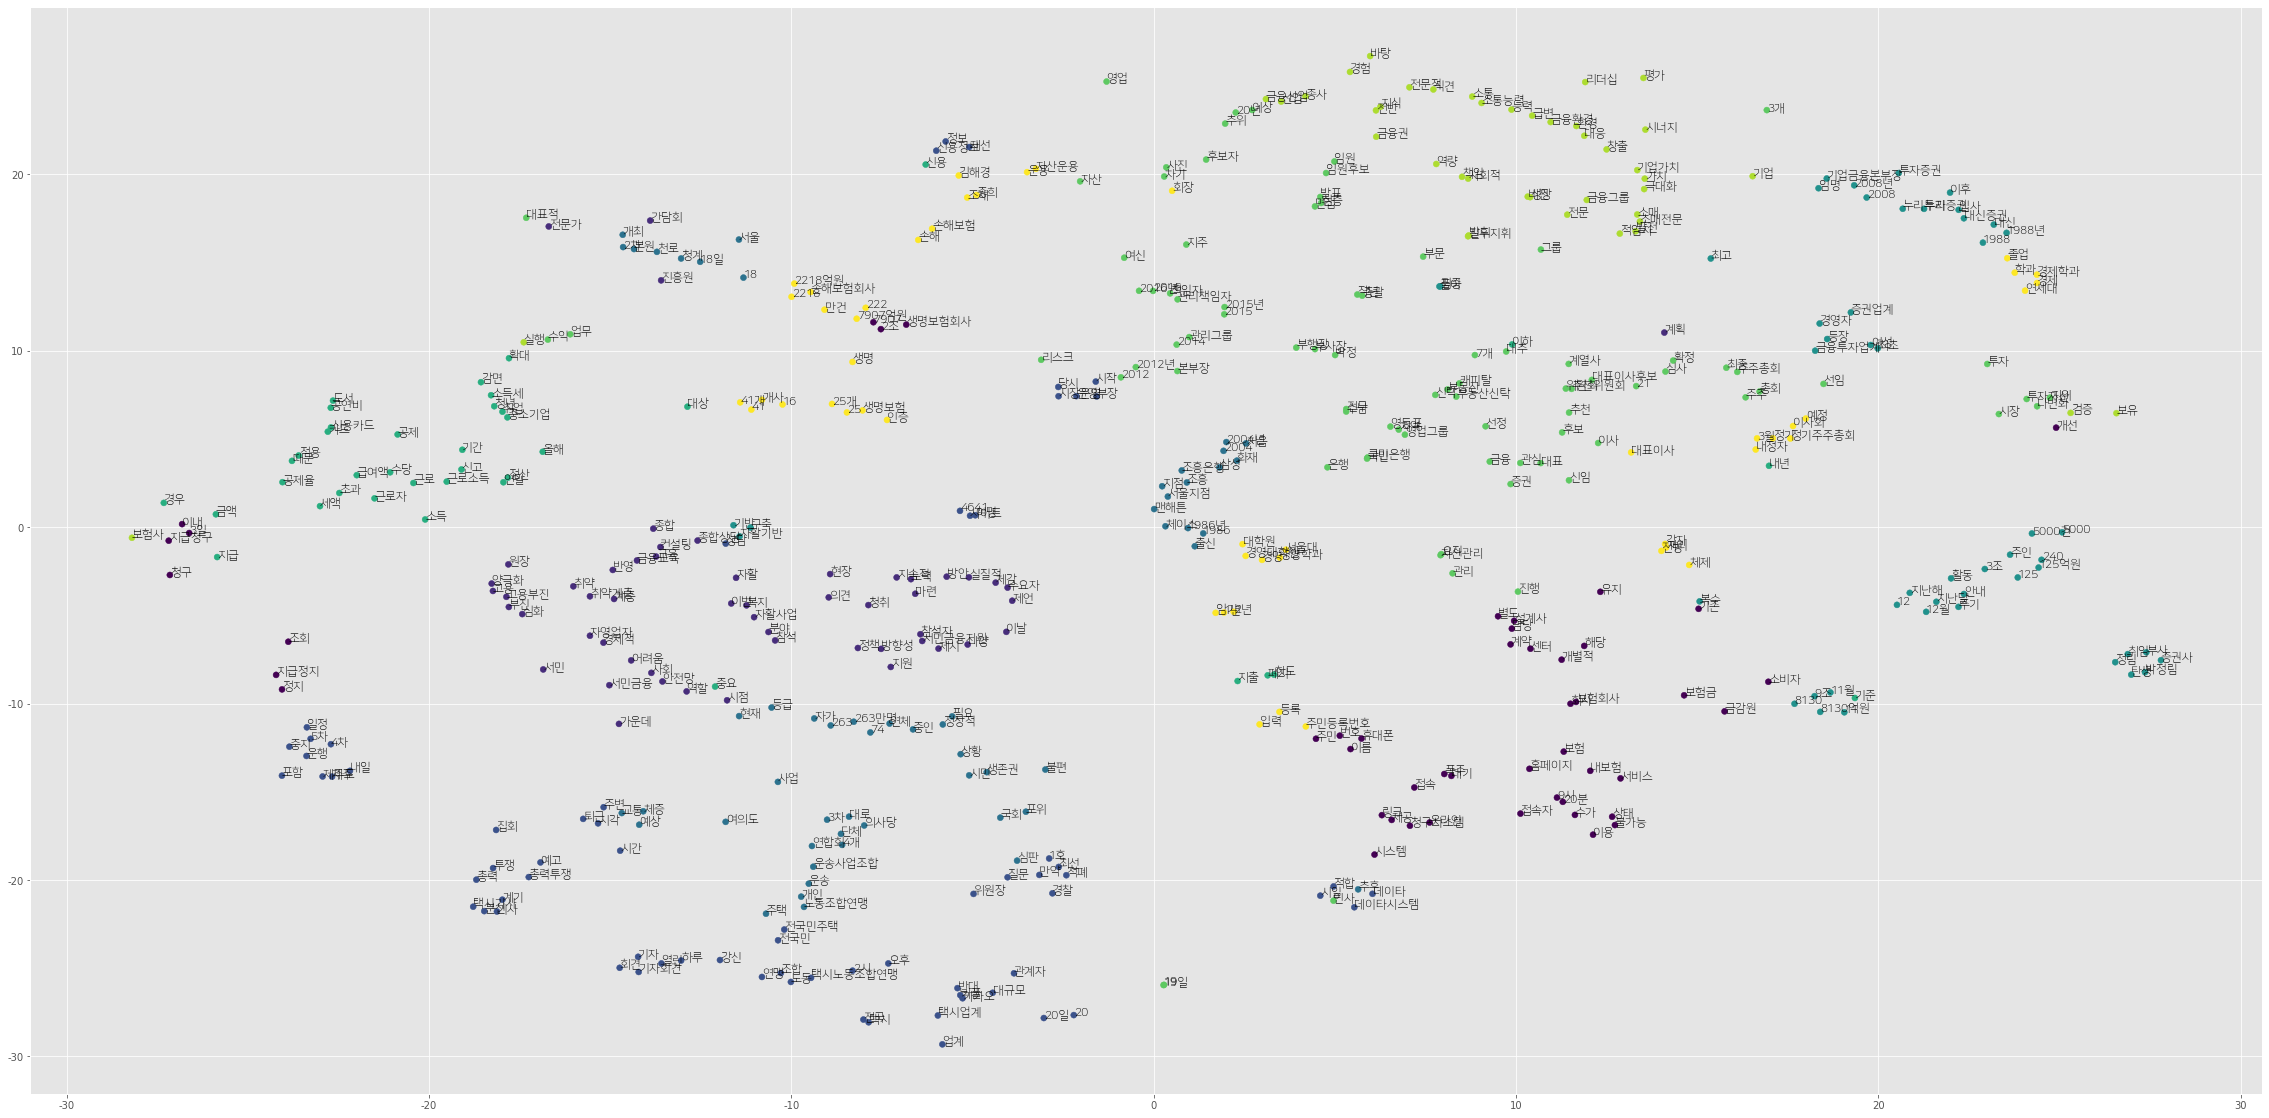

In [143]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"], df["y"],c=df['cluster'])

for word, pos in list(df.iloc[:,:-1].iterrows()):
    ax.annotate(word, pos, fontsize=12, fontproperties=prop)
plt.show()

## tdm과 dtm을 활용한 classification

#### 일단 t-sne(매니폴드 학습)에 대해서 공부